<a href="https://colab.research.google.com/github/Santo1337/Diabetes-Prediction/blob/main/diabetecs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from google.colab import drive
drive.mount('/content/gdrive')

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/diabetes_data_upload (1).csv')

In [ ]:
dff = pd.read_csv('gdrive/My Drive/Colab Notebooks/diabetes_data_upload (1).csv')
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in dff.columns[~(dff.columns.isin(['Age']))].tolist():
    dff[col] = le.fit_transform(dff[col])

# Graph

In [ ]:
df .head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
dff .head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

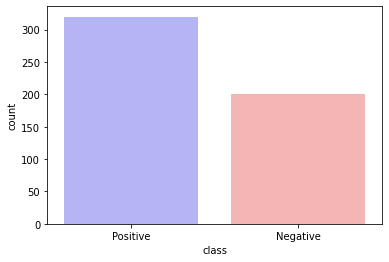

In [ ]:
sns.countplot(x="class", data=df, palette="bwr")
plt.show()

In [ ]:
feature =['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']

In [ ]:
list(enumerate(feature))

[(0, 'Gender'),
 (1, 'Polyuria'),
 (2, 'Polydipsia'),
 (3, 'sudden weight loss'),
 (4, 'weakness'),
 (5, 'Polyphagia'),
 (6, 'Genital thrush'),
 (7, 'visual blurring'),
 (8, 'Itching'),
 (9, 'Irritability'),
 (10, 'delayed healing'),
 (11, 'partial paresis'),
 (12, 'muscle stiffness'),
 (13, 'Alopecia'),
 (14, 'Obesity')]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

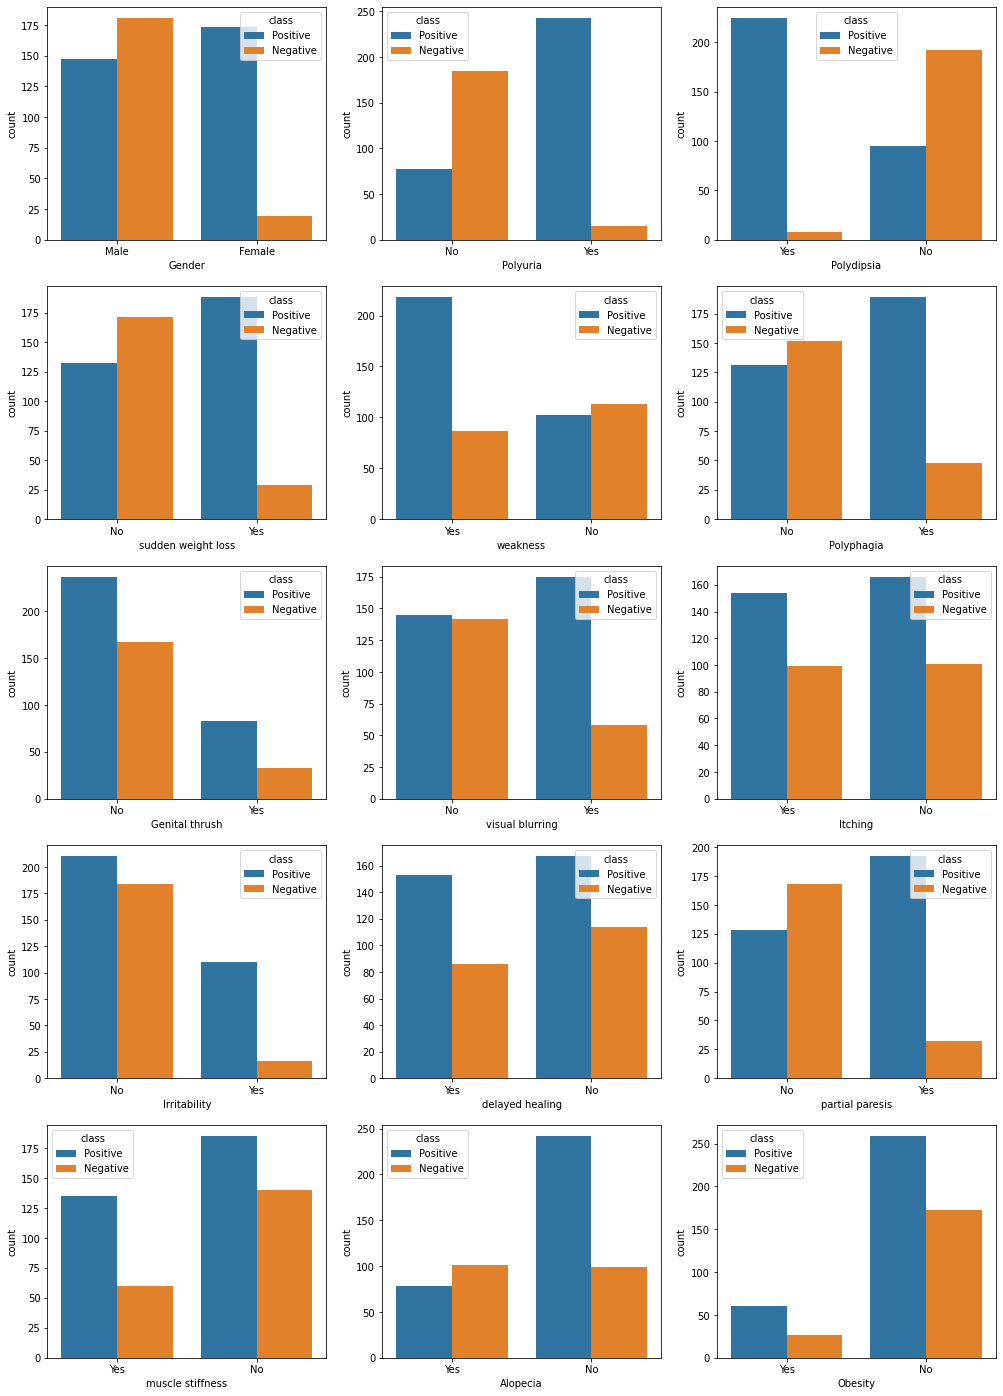

In [ ]:
plt.figure(figsize = (17, 30))
for i in enumerate(feature):
    plt.subplot(6, 3,i[0]+1)
    sns.countplot(i[1], hue = 'class', data = df)

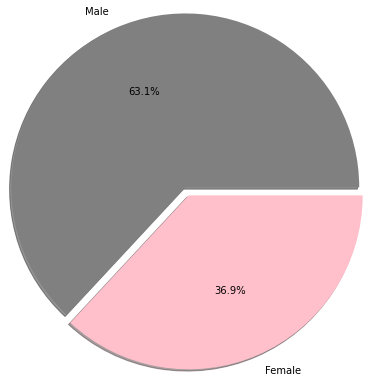

In [ ]:
List = ['Male','Female']
cl = ['grey','pink']
plt.pie(df['Gender'].value_counts(),labels= List, autopct='%1.1f%%',radius= 2 ,shadow =True ,explode=[0.1,0],colors= cl)
plt.show()

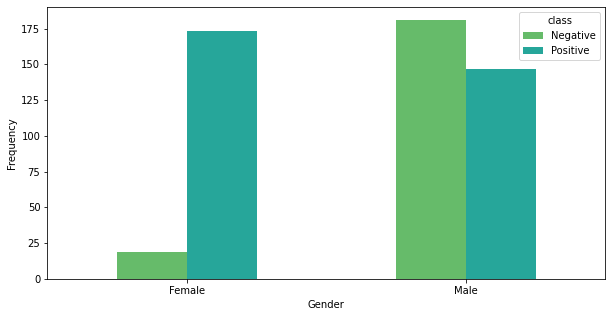

In [ ]:
pd.crosstab(df.Gender,df['class']).plot(kind="bar",figsize=(10,5),color=['#66bb6a','#26a69a' ])
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

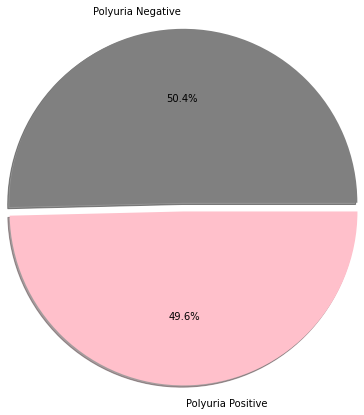

In [ ]:
List = ['Polyuria Negative','Polyuria Positive']
cl = ['grey','pink']
plt.pie(df['Polyuria'].value_counts(),labels= List, autopct='%1.1f%%',radius= 2 ,shadow =True ,explode=[0.1,0],colors= cl)
plt.show()

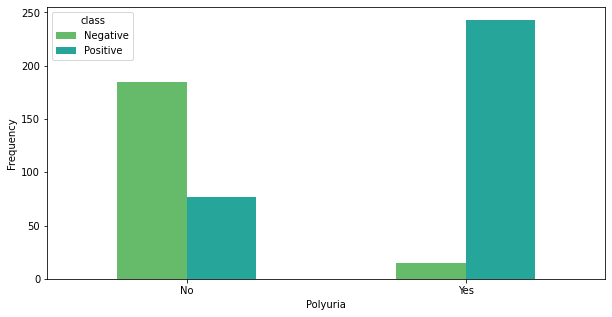

In [ ]:
pd.crosstab(df.Polyuria,df['class']).plot(kind="bar",figsize=(10,5),color=['#66bb6a','#26a69a' ])
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [ ]:
A = df.drop([ 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'], axis = 1)

In [ ]:
r = [0,13, 20, 35, 50, 65, 120]
g = ['child','teenager','young','adult','mid-age','senior']
A['Age'] = pd.cut(A['Age'], bins=r, labels=g)

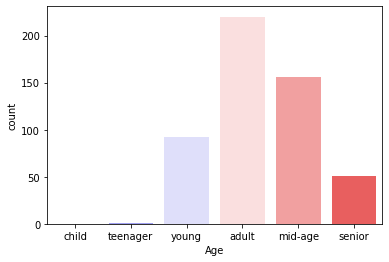

In [ ]:
sns.countplot(x="Age", data=A, palette="bwr")
plt.show()

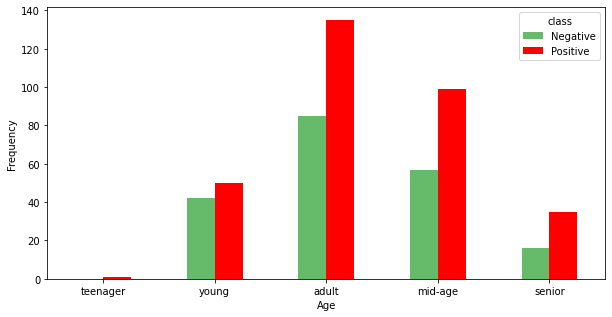

In [ ]:
pd.crosstab(A.Age,A['class']).plot(kind="bar",figsize=(10,5),color=['#66bb6a','#FF0000' ])
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

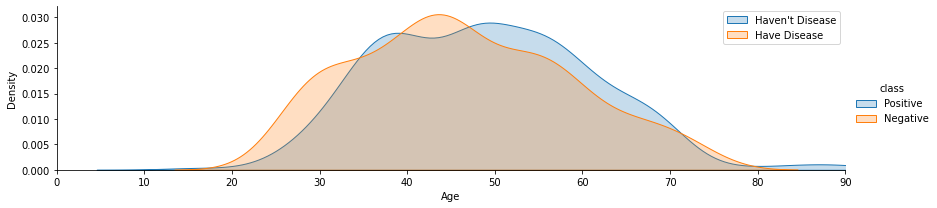

In [ ]:
facet = sns.FacetGrid(df, hue="class",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
plt.legend(["Haven't Disease", "Have Disease"])
facet.add_legend() 
plt.show()

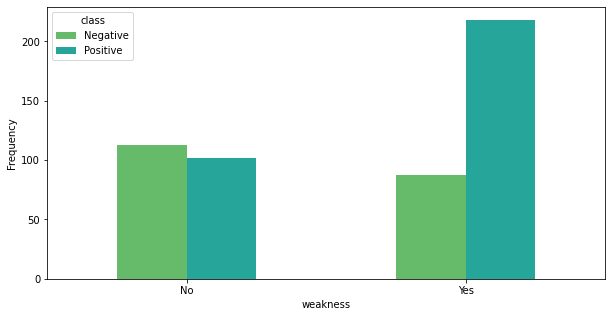

In [ ]:
pd.crosstab(df.weakness,df['class']).plot(kind="bar",figsize=(10,5),color=['#66bb6a','#26a69a' ])
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

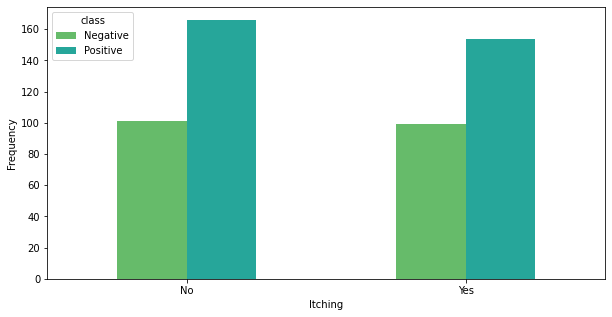

In [ ]:
pd.crosstab(df.Itching,df['class']).plot(kind="bar",figsize=(10,5),color=['#66bb6a','#26a69a' ])
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

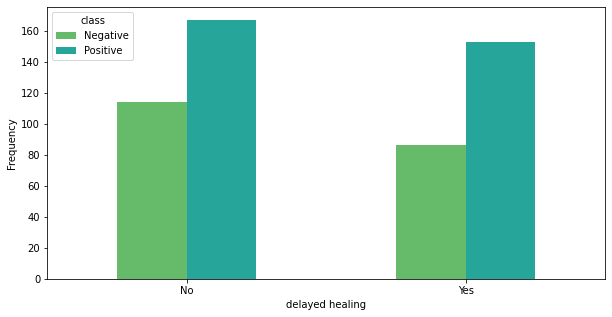

In [ ]:
pd.crosstab(df['delayed healing'],df['class']).plot(kind="bar",figsize=(10,5),color=['#66bb6a','#26a69a' ])
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

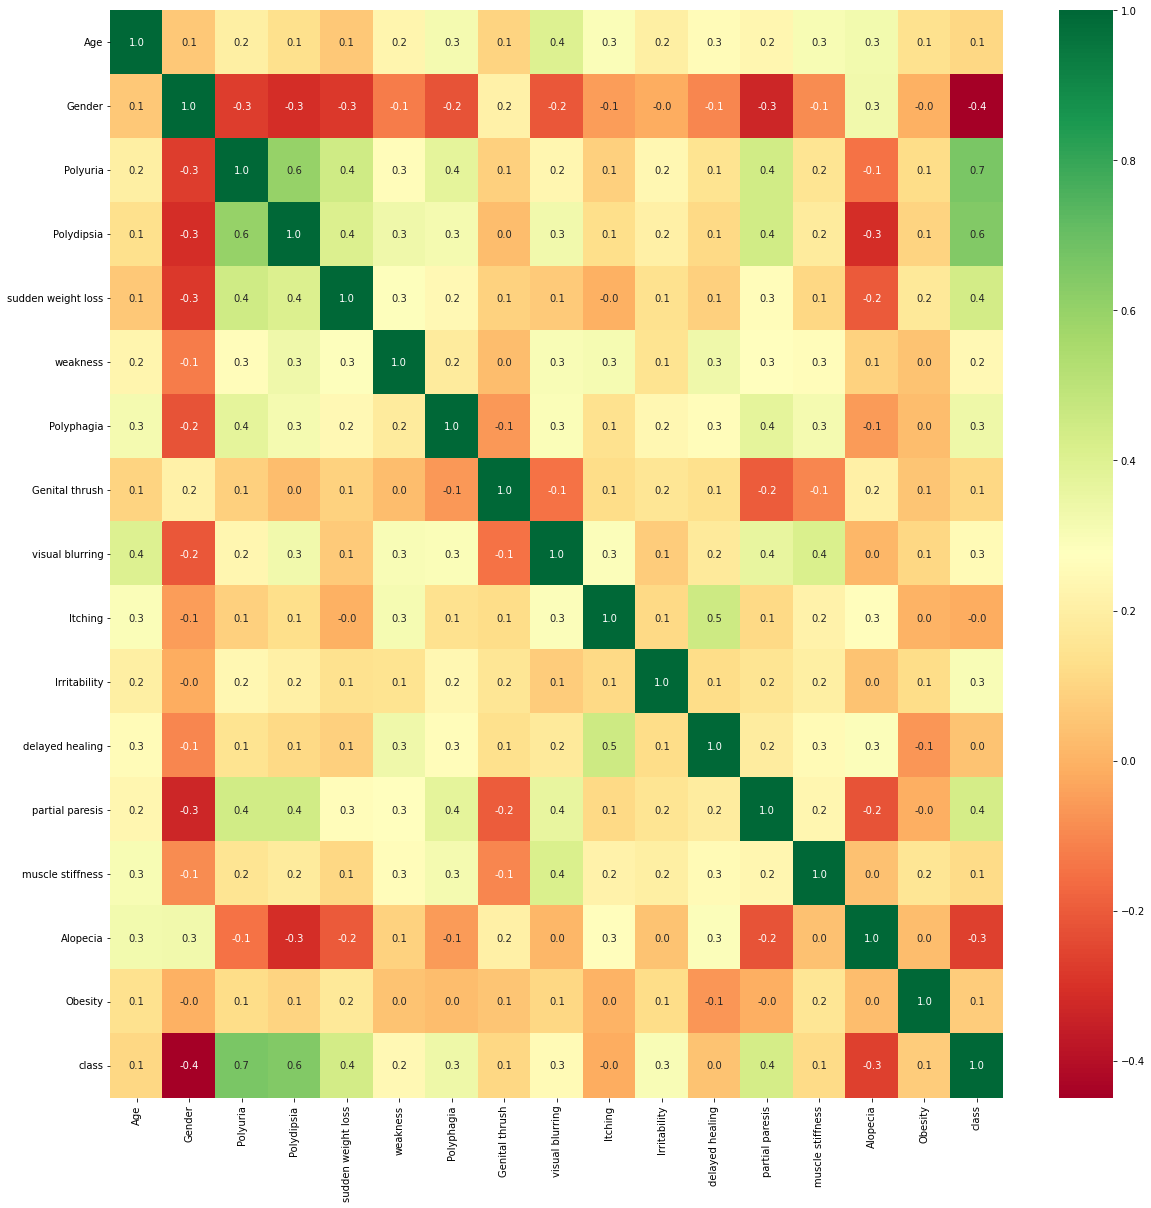

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(dff.corr(),annot=True,fmt='.1f',cmap ='RdYlGn')
plt.show()

# train_test_split

In [ ]:
X = dff.drop(['class'], axis = 1)
y = dff['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [ ]:
#RandomForest
randomForest=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
randomForest.fit(X_train,y_train)
randomForestPred=randomForest.predict(X_test)
randomForestAcu=accuracy_score(randomForestPred,y_test)

# DecisionTree Classifier
dTree=DecisionTreeClassifier(criterion='entropy',random_state=1)
dTree.fit(X_train,y_train)
dTreePred=dTree.predict(X_test)
dTreeAcu=accuracy_score(dTreePred,y_test)

#XGB
xgboost = XGBClassifier(n_estimators=100, n_jobs=1, random_state=0)
xgboost.fit(X_train, y_train)
xgboost_pred = xgboost.predict(X_test)
xgboost_accu = accuracy_score(y_test, xgboost_pred)

#etree
etree = ExtraTreesClassifier(n_estimators=100, random_state=10)
etree.fit(X_train, y_train)
etree_pred = etree.predict(X_test)
etree_Acu = accuracy_score(y_test, etree_pred)

#bagging
bagging = BaggingClassifier(base_estimator=dTree,n_estimators=10, random_state=0)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
bagging_Acu = accuracy_score(y_test, bagging_pred)

print('RandomForest Accuracy:\t\t',randomForestAcu)
print('DecisionTree Accuracy:\t\t',dTreeAcu)
print('xgboost Accuracy:\t\t',xgboost_accu)
print('etree Accuracy:\t\t\t',etree_Acu)
print('bagging Accuracy:\t\t',bagging_Acu)

RandomForest Accuracy:		 0.9935897435897436
DecisionTree Accuracy:		 0.9743589743589743
xgboost Accuracy:		 0.9743589743589743
etree Accuracy:			 0.9871794871794872
bagging Accuracy:		 0.9807692307692307


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

In [ ]:
randomForest_conf_matrix = confusion_matrix(y_test, randomForestPred, labels=[1,0])
dTree_conf_matrix = confusion_matrix(y_test, dTreePred, labels=[1,0])
xgboost_conf_matrix = confusion_matrix(y_test, xgboost_pred, labels=[1,0])
etree_conf_matrix = confusion_matrix(y_test, etree_pred, labels=[1,0])
bagging_conf_matrix = confusion_matrix(y_test, bagging_pred, labels=[1,0])

In [ ]:
print(f'Random Forest\n{randomForest_conf_matrix}')
print(f'Decision Tree\n{dTree_conf_matrix}')
print(f'xgboost\n{xgboost_conf_matrix}')
print(f'etree\n{etree_conf_matrix}')
print(f'bagging\n{bagging_conf_matrix}')

Random Forest
[[91  0]
 [ 1 64]]
Decision Tree
[[89  2]
 [ 2 63]]
xgboost
[[88  3]
 [ 1 64]]
etree
[[90  1]
 [ 1 64]]
bagging
[[88  3]
 [ 0 65]]


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from inspect import signature

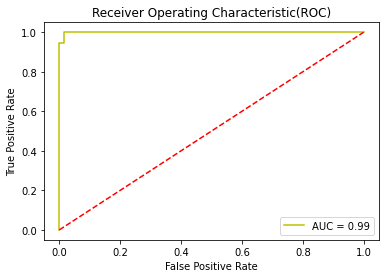

In [ ]:
probs = randomForest.predict_proba(X_test)
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = roc_auc_score(y_test, randomForest.predict(X_test))
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_pred = randomForest.predict(X_test)
rd_recall = recall_score(y_test, y_pred)
print("recall score: ",rd_recall )
rd_precision = precision_score(y_test, y_pred)
print("precision score: ", rd_precision)
rd_f1 = f1_score(y_test, y_pred)
print("f1 score: ",rd_f1)
print("accuracy: ", accuracy_score(y_test, y_pred))

recall score:  1.0
precision score:  0.9891304347826086
f1 score:  0.994535519125683
accuracy:  0.9935897435897436


In [ ]:
total = sum(sum(randomForest_conf_matrix))
accuracy=(randomForest_conf_matrix[0,0]+randomForest_conf_matrix[1,1])/total
print ('Accuracy : ', accuracy)
rd_sensitivity = randomForest_conf_matrix[0,0]/(randomForest_conf_matrix[0,0]+randomForest_conf_matrix[0,1])
print('Sensitivity : ', rd_sensitivity )
rd_specificity = randomForest_conf_matrix[1,1]/(randomForest_conf_matrix[1,0]+randomForest_conf_matrix[1,1])
print('Specificity : ', rd_specificity)

Accuracy :  0.9935897435897436
Sensitivity :  1.0
Specificity :  0.9846153846153847


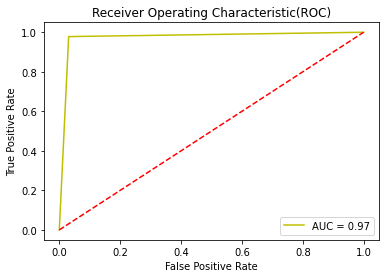

In [ ]:
probs = dTree.predict_proba(X_test)
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = roc_auc_score(y_test, dTree.predict(X_test))
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_pred = dTree.predict(X_test)
dt_recall = recall_score(y_test, y_pred)
print("recall score: ",dt_recall )
dt_precision = precision_score(y_test, y_pred)
print("precision score: ", dt_precision)
dt_f1 = f1_score(y_test, y_pred)
print("f1 score: ",dt_f1)
print("accuracy: ", accuracy_score(y_test, y_pred))

recall score:  0.978021978021978
precision score:  0.978021978021978
f1 score:  0.978021978021978
accuracy:  0.9743589743589743


In [ ]:
total = sum(sum(dTree_conf_matrix))
accuracy=(dTree_conf_matrix[0,0]+dTree_conf_matrix[1,1])/total
print ('Accuracy : ', accuracy)
dt_sensitivity = dTree_conf_matrix[0,0]/(dTree_conf_matrix[0,0]+dTree_conf_matrix[0,1])
print('Sensitivity : ', dt_sensitivity )
dt_specificity = dTree_conf_matrix[1,1]/(dTree_conf_matrix[1,0]+dTree_conf_matrix[1,1])
print('Specificity : ', dt_specificity)

Accuracy :  0.9743589743589743
Sensitivity :  0.978021978021978
Specificity :  0.9692307692307692


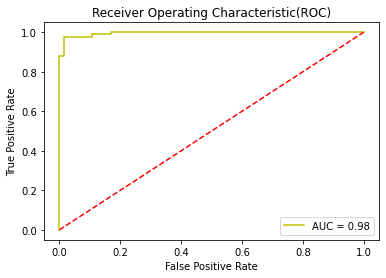

In [ ]:
probs = xgboost.predict_proba(X_test)
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = roc_auc_score(y_test, xgboost.predict(X_test))
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_pred = xgboost.predict(X_test)
xg_recall = recall_score(y_test, y_pred)
print("recall score: ",xg_recall )
xg_precision = precision_score(y_test, y_pred)
print("precision score: ", xg_precision)
xg_f1 = f1_score(y_test, y_pred)
print("f1 score: ",xg_f1)
print("accuracy: ", accuracy_score(y_test, y_pred))

recall score:  0.967032967032967
precision score:  0.9887640449438202
f1 score:  0.9777777777777779
accuracy:  0.9743589743589743


In [ ]:
total = sum(sum(xgboost_conf_matrix))
accuracy=(xgboost_conf_matrix[0,0]+xgboost_conf_matrix[1,1])/total
print ('Accuracy : ', accuracy)
xg_sensitivity = xgboost_conf_matrix[0,0]/(xgboost_conf_matrix[0,0]+xgboost_conf_matrix[0,1])
print('Sensitivity : ', xg_sensitivity )
xg_specificity = xgboost_conf_matrix[1,1]/(xgboost_conf_matrix[1,0]+xgboost_conf_matrix[1,1])
print('Specificity : ', xg_specificity)

Accuracy :  0.9743589743589743
Sensitivity :  0.967032967032967
Specificity :  0.9846153846153847


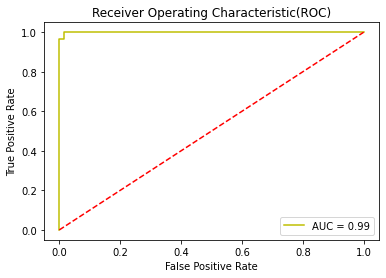

In [ ]:
probs = etree.predict_proba(X_test)
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = roc_auc_score(y_test, etree.predict(X_test))
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_pred = etree.predict(X_test)
et_recall = recall_score(y_test, y_pred)
print("recall score: ",et_recall )
et_precision = precision_score(y_test, y_pred)
print("precision score: ", et_precision)
et_f1 = f1_score(y_test, y_pred)
print("f1 score: ",et_f1)
print("accuracy: ", accuracy_score(y_test, y_pred))

recall score:  0.989010989010989
precision score:  0.989010989010989
f1 score:  0.989010989010989
accuracy:  0.9871794871794872


In [ ]:
total = sum(sum(etree_conf_matrix))
accuracy=(etree_conf_matrix[0,0]+etree_conf_matrix[1,1])/total
print ('Accuracy : ', accuracy)
et_sensitivity = etree_conf_matrix[0,0]/(etree_conf_matrix[0,0]+etree_conf_matrix[0,1])
print('Sensitivity : ', et_sensitivity )
et_specificity = etree_conf_matrix[1,1]/(etree_conf_matrix[1,0]+etree_conf_matrix[1,1])
print('Specificity : ', et_specificity)

Accuracy :  0.9871794871794872
Sensitivity :  0.989010989010989
Specificity :  0.9846153846153847


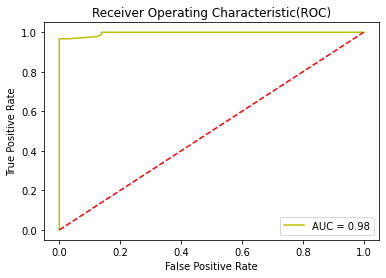

In [ ]:
probs = bagging.predict_proba(X_test)
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = roc_auc_score(y_test, bagging.predict(X_test))
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_pred = bagging.predict(X_test)
bc_recall = recall_score(y_test, y_pred)
print("recall score: ",bc_recall )
bc_precision = precision_score(y_test, y_pred)
print("precision score: ", bc_precision)
bc_f1 = f1_score(y_test, y_pred)
print("f1 score: ",bc_f1)
print("accuracy: ", accuracy_score(y_test, y_pred))

recall score:  0.967032967032967
precision score:  1.0
f1 score:  0.9832402234636871
accuracy:  0.9807692307692307


In [ ]:
total = sum(sum(bagging_conf_matrix))
accuracy=(bagging_conf_matrix[0,0]+bagging_conf_matrix[1,1])/total
print ('Accuracy : ', accuracy)
bc_sensitivity = bagging_conf_matrix[0,0]/(bagging_conf_matrix[0,0]+bagging_conf_matrix[0,1])
print('Sensitivity : ', bc_sensitivity )
bc_specificity = bagging_conf_matrix[1,1]/(bagging_conf_matrix[1,0]+bagging_conf_matrix[1,1])
print('Specificity : ', bc_specificity)

Accuracy :  0.9807692307692307
Sensitivity :  0.967032967032967
Specificity :  1.0


In [ ]:
print('RandomForest Accuracy:\t\t',randomForestAcu)
print('DecisionTree Accuracy:\t\t',dTreeAcu)
print('xgboost Accuracy:\t\t',xgboost_accu)
print('etree Accuracy:\t\t\t',etree_Acu)
print('bagging Accuracy:\t\t',bagging_Acu)

RandomForest Accuracy:		 0.9935897435897436
DecisionTree Accuracy:		 0.9743589743589743
xgboost Accuracy:		 0.9743589743589743
etree Accuracy:			 0.9871794871794872
bagging Accuracy:		 0.9807692307692307


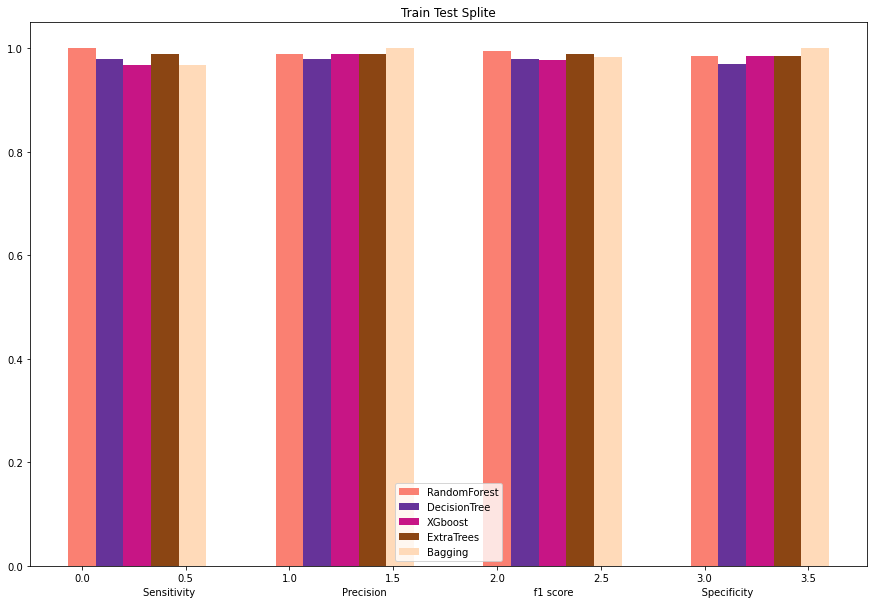

In [ ]:
dat = [[rd_recall, rd_precision, rd_f1, rd_specificity],
  [dt_recall, dt_precision, dt_f1, dt_specificity],
  [xg_recall, xg_precision, xg_f1, xg_specificity],
  [et_recall, et_precision, et_f1, et_specificity],
  [bc_recall, bc_precision, bc_f1, bc_specificity],[]]

colors_list = ['Salmon','RebeccaPurple', 'MediumVioletRed', 'SaddleBrown','PeachPuff']
gap = .8 / len(dat)
plt.figure(figsize=(15,10))
for i, row in enumerate(dat):
  plt.title("Train Test Splite")
  plt.legend(["RandomForest", "DecisionTree","XGboost","ExtraTrees","Bagging"])
  plt.xlabel('Sensitivity                                               Precision                                               f1 score                                         Specificity')
  Z = np.arange(len(row))
  plt.bar(Z + i * gap, row,
    width = gap,
    color = colors_list[i % len(colors_list)])

plt.show()

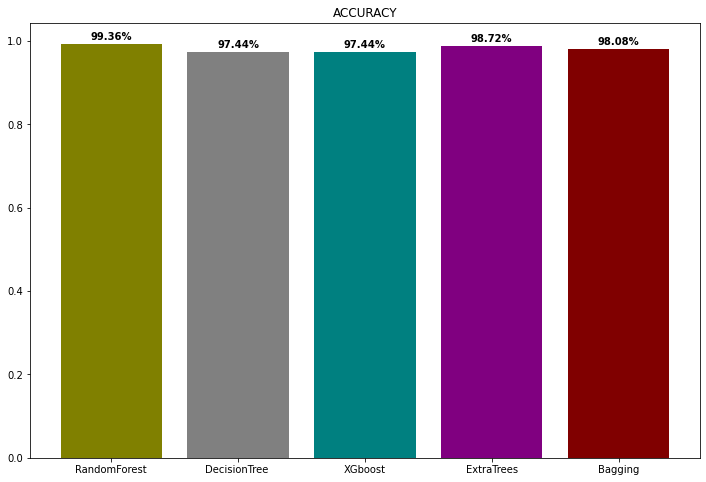

In [ ]:
data = pd.DataFrame({'A':['RandomForest','DecisionTree ','XGboost','ExtraTrees','Bagging'],
                     'B':[randomForestAcu,dTreeAcu,xgboost_accu,etree_Acu,bagging_Acu]
                    })

percentage = []
for i in range(data.shape[0]):
    pct = (data.B[i]) * 100
    percentage.append(round(pct,2))
data['Percentage'] = percentage

plt.figure(figsize=(12,8))
plt.title("ACCURACY")
colors_list = ['Olive','Gray', 'Teal', 'Purple','maroon']
graph = plt.bar(data.A,data.B, color = colors_list)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(data.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

# Decision Tree

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
cn = ['Negative','Positive']
dot_data = StringIO()
export_graphviz(dTree, out_file=dot_data,
                feature_names=X.columns,class_names=cn,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

ModuleNotFoundError: ignored

# KFold

In [ ]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
kfold = KFold(n_splits=9, random_state=10, shuffle=False)

ValueError: ignored

In [ ]:
X = dff.drop(['class'], axis = 1)
y = dff['class']

In [ ]:
#RandomForest
randomForest1 = RandomForestClassifier(n_estimators=100, random_state=0)
scoring = 'accuracy'
score = cross_val_score(randomForest1,X, y, cv=kfold, n_jobs=1, scoring=scoring)
randomForestAcu1=score.mean()

# DecisionTree Classifier
dTree1 = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(dTree1, X, y, cv=kfold, n_jobs=1, scoring=scoring)
dTreeAcu1=score.mean()

#XGB
xgboost1 = XGBClassifier()
scoring = 'accuracy'
score = cross_val_score(xgboost1, X, y, cv=kfold, n_jobs=1, scoring=scoring)
xgboost_accu1=score.mean()

#etree
etree1 = ExtraTreesClassifier(n_estimators=100, random_state=70)
scoring = 'accuracy'
score = cross_val_score(etree1, X, y, cv=kfold, n_jobs=1, scoring=scoring)
etree_Acu1=score.mean()

#bagging
bagging1 = BaggingClassifier(base_estimator=dTree1,n_estimators=10, random_state=0)
scoring = 'accuracy'
score = cross_val_score(bagging1, X, y, cv=kfold, n_jobs=1, scoring=scoring)
bagging_Acu1=score.mean()

print('RandomForest Accuracy:\t\t',randomForestAcu1)
print('DecisionTree Accuracy:\t\t',dTreeAcu1)
print('xgboost Accuracy:\t\t',xgboost_accu1)
print('etree Accuracy:\t\t\t',etree_Acu1)
print('bagging Accuracy:\t\t',bagging_Acu1)

NameError: ignored

In [ ]:
y_pred = cross_val_predict(randomForest1, X, y, cv=kfold)
randomForest_conf_matrix1 = confusion_matrix(y, y_pred, labels=[1,0])

y_pred = cross_val_predict(dTree1, X, y, cv=kfold)
dTree_conf_matrix1 = confusion_matrix(y, y_pred, labels=[1,0])

y_pred = cross_val_predict(xgboost1, X, y, cv=kfold)
xgboost_conf_matrix1 = confusion_matrix(y, y_pred, labels=[1,0])

y_pred = cross_val_predict(etree1, X, y, cv=kfold)
etree_conf_matrix1 = confusion_matrix(y, y_pred, labels=[1,0])

y_pred = cross_val_predict(bagging1, X, y, cv=kfold)
bagging_conf_matrix1 = confusion_matrix(y, y_pred, labels=[1,0])

NameError: ignored

In [ ]:
print(f'Random Forest\n{randomForest_conf_matrix1}')
print(f'Decision Tree\n{dTree_conf_matrix1}')
print(f'xgboost\n{xgboost_conf_matrix1}')
print(f'etree\n{etree_conf_matrix1}')
print(f'bagging\n{bagging_conf_matrix1}')

NameError: ignored

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import average_precision_score
from inspect import signature

In [ ]:
from sklearn.model_selection import StratifiedKFold
SKfold = StratifiedKFold(n_splits=9, random_state=10, shuffle=False)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
A, B = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

random_state = np.random.RandomState(0)
A = np.c_[A, random_state.randn(n_samples, 200 * n_features)]

NameError: ignored

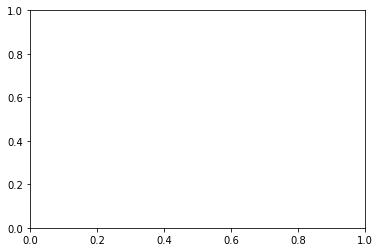

In [ ]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, test) in enumerate(SKfold.split(A, B)):
    randomForest1.fit(A[train], B[train])
    viz = plot_roc_curve(randomForest1, A[test], B[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [ ]:
total = sum(sum(randomForest_conf_matrix1))
accuracy1=(randomForest_conf_matrix1[0,0]+randomForest_conf_matrix1[1,1])/total
print ('Accuracy : ', accuracy1)
rd_sensitivity1 = randomForest_conf_matrix1[0,0]/(randomForest_conf_matrix1[0,0]+randomForest_conf_matrix1[0,1])
print('Sensitivity : ', rd_sensitivity1 )
rd_specificity1 = randomForest_conf_matrix1[1,1]/(randomForest_conf_matrix1[1,0]+randomForest_conf_matrix1[1,1])
print('Specificity : ', rd_specificity1)
rd_precision1 = randomForest_conf_matrix1[0,0]/(randomForest_conf_matrix1[0,0]+randomForest_conf_matrix1[1,0])
print('precision : ', rd_precision1 )
rd_recall1 = randomForest_conf_matrix1[0,0]/(randomForest_conf_matrix1[0,0]+randomForest_conf_matrix1[0,1])
print('recall : ', rd_recall1 )
rd_f1_score1 = 2 * ((rd_precision1*rd_recall1)/(rd_precision1+rd_recall1))
print('f1 score : ', rd_f1_score1 )

NameError: ignored

NameError: ignored

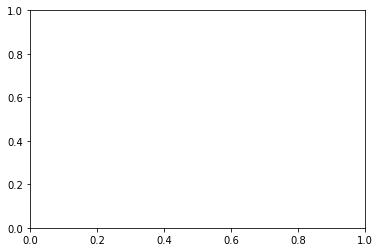

In [ ]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, test) in enumerate(SKfold.split(A, B)):
    dTree1.fit(A[train], B[train])
    viz = plot_roc_curve(dTree1, A[test], B[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [ ]:
total = sum(sum(dTree_conf_matrix1))
accuracy1=(dTree_conf_matrix1[0,0]+dTree_conf_matrix1[1,1])/total
print ('Accuracy : ', accuracy1)
dt_sensitivity1 = dTree_conf_matrix1[0,0]/(dTree_conf_matrix1[0,0]+dTree_conf_matrix1[0,1])
print('Sensitivity : ', dt_sensitivity1 )
dt_specificity1 = dTree_conf_matrix1[1,1]/(dTree_conf_matrix1[1,0]+dTree_conf_matrix1[1,1])
print('Specificity : ', dt_specificity1)
dt_precision1 = dTree_conf_matrix1[0,0]/(dTree_conf_matrix1[0,0]+dTree_conf_matrix1[1,0])
print('precision : ', dt_precision1 )
dt_recall1 = dTree_conf_matrix1[0,0]/(dTree_conf_matrix1[0,0]+dTree_conf_matrix1[0,1])
print('recall : ', dt_recall1 )
dt_f1_score1 = 2 * ((dt_precision1*dt_recall1)/(dt_precision1+dt_recall1))
print('f1 score : ', dt_f1_score1 )

NameError: ignored

NameError: ignored

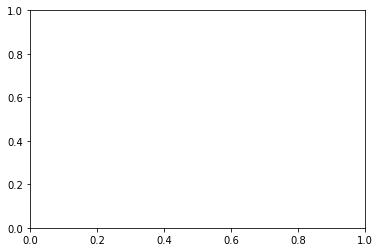

In [ ]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, test) in enumerate(SKfold.split(A, B)):
    xgboost1.fit(A[train], B[train])
    viz = plot_roc_curve(xgboost1, A[test], B[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [ ]:
total = sum(sum(xgboost_conf_matrix1))
accuracy1=(xgboost_conf_matrix1[0,0]+xgboost_conf_matrix1[1,1])/total
print ('Accuracy : ', accuracy1)
xg_sensitivity1 = xgboost_conf_matrix1[0,0]/(xgboost_conf_matrix1[0,0]+xgboost_conf_matrix1[0,1])
print('Sensitivity : ', xg_sensitivity1 )
xg_specificity1 = xgboost_conf_matrix1[1,1]/(xgboost_conf_matrix1[1,0]+xgboost_conf_matrix1[1,1])
print('Specificity : ', xg_specificity1)
xg_precision1 = xgboost_conf_matrix1[0,0]/(xgboost_conf_matrix1[0,0]+xgboost_conf_matrix1[1,0])
print('precision : ', xg_precision1 )
xg_recall1 = xgboost_conf_matrix1[0,0]/(xgboost_conf_matrix1[0,0]+xgboost_conf_matrix1[0,1])
print('recall : ', xg_recall1 )
xg_f1_score1 = 2 * ((xg_precision1*xg_recall1)/(xg_precision1+xg_recall1))
print('f1 score : ', xg_f1_score1 )

NameError: ignored

NameError: ignored

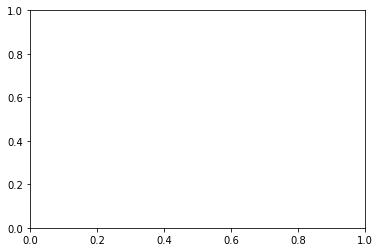

In [ ]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, test) in enumerate(SKfold.split(A, B)):
    etree1.fit(A[train], B[train])
    viz = plot_roc_curve(etree1, A[test], B[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [ ]:
total = sum(sum(etree_conf_matrix1))
accuracy1=(etree_conf_matrix1[0,0]+etree_conf_matrix1[1,1])/total
print ('Accuracy : ', accuracy1)
et_sensitivity1 = etree_conf_matrix1[0,0]/(etree_conf_matrix1[0,0]+etree_conf_matrix1[0,1])
print('Sensitivity : ', et_sensitivity1 )
et_specificity1 = etree_conf_matrix1[1,1]/(etree_conf_matrix1[1,0]+etree_conf_matrix1[1,1])
print('Specificity : ', et_specificity1)
et_precision1 = etree_conf_matrix1[0,0]/(etree_conf_matrix1[0,0]+etree_conf_matrix1[1,0])
print('precision : ', et_precision1 )
et_recall1 = etree_conf_matrix1[0,0]/(etree_conf_matrix1[0,0]+etree_conf_matrix1[0,1])
print('recall : ', et_recall1 )
et_f1_score1 = 2 * ((et_precision1*et_recall1)/(et_precision1+et_recall1))
print('f1 score : ', et_f1_score1 )

NameError: ignored

NameError: ignored

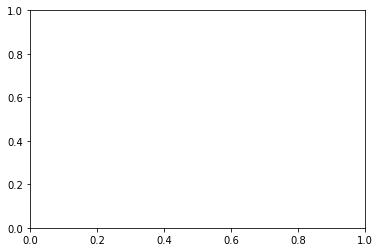

In [ ]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, test) in enumerate(SKfold.split(A, B)):
    bagging1.fit(A[train], B[train])
    viz = plot_roc_curve(bagging1, A[test], B[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [ ]:
total = sum(sum(bagging_conf_matrix1))
accuracy1=(bagging_conf_matrix1[0,0]+bagging_conf_matrix1[1,1])/total
print ('Accuracy : ', accuracy1)
bc_sensitivity1 = bagging_conf_matrix1[0,0]/(bagging_conf_matrix1[0,0]+bagging_conf_matrix1[0,1])
print('Sensitivity : ', bc_sensitivity1 )
bc_specificity1 = bagging_conf_matrix1[1,1]/(bagging_conf_matrix1[1,0]+bagging_conf_matrix1[1,1])
print('Specificity : ', bc_specificity1)
bc_precision1 = bagging_conf_matrix1[0,0]/(bagging_conf_matrix1[0,0]+bagging_conf_matrix1[1,0])
print('precision : ', bc_precision1 )
bc_recall1 = bagging_conf_matrix1[0,0]/(bagging_conf_matrix1[0,0]+bagging_conf_matrix1[0,1])
print('recall : ', bc_recall1 )
bc_f1_score1 = 2 * ((bc_precision1*bc_recall1)/(bc_precision1+bc_recall1))
print('f1 score : ', bc_f1_score1 )

NameError: ignored

In [ ]:
print('RandomForest Accuracy:\t\t',randomForestAcu1)
print('DecisionTree Accuracy:\t\t',dTreeAcu1)
print('xgboost Accuracy:\t\t',xgboost_accu1)
print('etree Accuracy:\t\t\t',etree_Acu1)
print('bagging Accuracy:\t\t',bagging_Acu1)

NameError: ignored

In [ ]:
datas = [[rd_recall1, rd_precision1, rd_f1_score1, rd_specificity1],
  [dt_recall1, dt_precision1, dt_f1_score1, dt_specificity1],
  [xg_recall1, xg_precision1, xg_f1_score1, xg_specificity1],
  [et_recall1, et_precision1, et_f1_score1, et_specificity1],
  [bc_recall1, bc_precision1, bc_f1_score1, bc_specificity1],[]]

colors_list = ['Salmon','RebeccaPurple', 'MediumVioletRed', 'SaddleBrown','PeachPuff']
gap = .8 / len(datas)
plt.figure(figsize=(15,10))
for i, row in enumerate(datas):
  plt.title("KFold Crossvalidation")
  plt.legend(["RandomForest", "DecisionTree","XGboost","ExtraTrees","Bagging"])
  plt.xlabel('Sensitivity                                               Precision                                               f1 score                                         Specificity')
  Q = np.arange(len(row))
  plt.bar(Q + i * gap, row,
    width = gap,
    color = colors_list[i % len(colors_list)])

plt.show()

NameError: ignored

In [ ]:
data = pd.DataFrame({'A':['RandomForest','DecisionTree ','XGboost','ExtraTrees','Bagging'],
                     'B':[randomForestAcu1,dTreeAcu1,xgboost_accu1,etree_Acu1,bagging_Acu1]
                    })

percentage = []
for i in range(data.shape[0]):
    pct = (data.B[i]) * 100
    percentage.append(round(pct,2))
data['Percentage'] = percentage

plt.figure(figsize=(12,8))
colors_list = ['Olive','Gray', 'Teal', 'Purple','maroon']
graph = plt.bar(data.A,data.B, color = colors_list)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(data.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

NameError: ignored